In [1]:
import numpy as np

# Test utils

In [2]:
from utils import generate_departures_from_routes, generate_visits_from_routes


In [3]:
run test_utils.py

routes:
 [[[1 2 0 0]
  [0 0 0 0]
  [4 3 2 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [3 4 0 0]
  [0 0 0 0]
  [1 2 0 0]]]
out:
visits:
 [[ True False False  True]
 [ True False  True  True]
 [False  True  True False]
 [False  True  True False]]
departures:
 [[ True False  True False]
 [False  True False  True]]


In [4]:
routes

array([[[1, 2, 0, 0],
        [0, 0, 0, 0],
        [4, 3, 2, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [3, 4, 0, 0],
        [0, 0, 0, 0],
        [1, 2, 0, 0]]])

In [5]:
visits*1

array([[1, 0, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 0]])

In [6]:
departures*1

array([[1, 0, 1, 0],
       [0, 1, 0, 1]])

In [7]:
np.array_equal(visits.sum(axis=1), np.array([2, 3, 2, 2]))

True

# Port visualize routes

In [8]:
len(visits)

4

# Test constraints

Python 3.10.6 (main, Mar 10 2023, 10:55:28) [GCC 11.3.0]
Type 'copyright', 'credits' or 'license' for more information
IPython 8.13.1 -- An enhanced Interactive Python. Type '?' for help.



In [1]:  exit


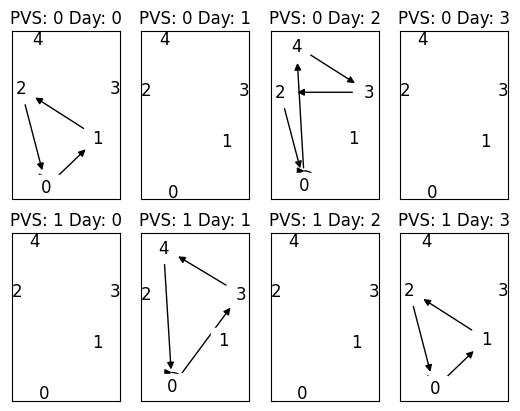

In [9]:
from utils import generate_departures_from_routes, generate_visits_from_routes
import numpy as np

routes = np.array([
    [[1, 2, 0, 0],
     [0, 0, 0, 0],
     [4, 3, 2, 0],
     [0, 0, 0, 0]],
    [[0, 0, 0, 0],
     [3, 4, 0, 0],
     [0, 0, 0, 0],
     [1, 2, 0, 0]]]
)

from visualize_route import visualize_route


visualize_route(routes, visits=generate_visits_from_routes(routes, n_days_in_period=4, n_installations=4), n_days=4)

In [10]:
from constraints import check_constraints_satisfied


check_constraints_satisfied(routes,
                            visits,
                            departures,
                            required_frequencies=np.array([2, 3, 2, 2]),
                            max_v_prepared=np.array([2, 2, 2, 1]),
                            n_days_available=np.array([2, 2]),
                            days_in_period=4,
                            )


day 0 prev -1
Services not sufficiently spread for  installation 0
routes
[[[1 2 0 0]
  [0 0 0 0]
  [4 3 2 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [3 4 0 0]
  [0 0 0 0]
  [1 2 0 0]]]
visits
[[1 0 0 1]
 [1 0 1 1]
 [0 1 1 0]
 [0 1 1 0]]
departures
[[1 0 1 0]
 [0 1 0 1]]


False

In [11]:
services

NameError: name 'services' is not defined

# Init visits and departures

In [ ]:
departures = np.array([[True, False, True, False],
          [False, True, False, True]])
visits = np.array([[True, False, False, True],
              [True, False, True, True],
              [False, True, True, False],
              [False, True, True, False]])


In [ ]:
max_psv_prepared_per_day = np.array([2,2,0,1])

In [ ]:
np.where(departures.sum(axis=0) > max_psv_prepared_per_day)[0]

In [ ]:
departures*1

In [ ]:
a = np.where(departures)

In [ ]:
a

In [ ]:
a[1][1:] - a[1][:-1]

In [ ]:
a[1][0:2]

In [ ]:
np.array(routes[:, :, 0] > 0, dtype=bool)

In [ ]:
visits = np.array([[1, 1, 1, 1],
                   [1, 0, 0, 1],
                   [1, 0, 1, 1],
                   [0, 1, 1, 0]])